In [3]:
#-----------------------------------------------------IMPORT LIBRARIES---------------------------------------------------------------------------------------
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from matplotlib import pyplot as plt 
from sklearn import preprocessing
from tensorflow.keras.models import Sequential

#--------------------------------------------------------DATASETS--------------------------------------------------------------------------------------------
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, rotation_range=0.2)
test_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, rotation_range=0.2)

training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI_FINAL/Train',target_size=(150,150), batch_size=32, class_mode='categorical')
testing_set=test_datagen.flow_from_directory('/content/drive/MyDrive/AI_FINAL/Test',target_size=(150,150), batch_size=32, class_mode='categorical')

training_set.class_indices
testing_set.class_indices

#-------------------------------------------------------CREATE MODEL-----------------------------------------------------------------------------------------
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(2,activation='softmax'))
model.summary()

#-------------------------------------------------------COMPILE MODEL-----------------------------------------------------------------------------------------
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=35,batch_size=128,verbose=1,validation_data=testing_set)

#-----------------------------------------------------EVALUATE ACCURACY---------------------------------------------------------------------------------------
Score=model.evaluate(training_set,verbose=0)
print('Loss', Score[0])
print('Accuracy', Score[1])

#--------------------------------------------------------SAVE MODEL-------------------------------------------------------------------------------------------
model.save("/content/drive/MyDrive/AI_FINAL/MaskDetection.h5")


Found 406 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/13 [==============================] - 13s 715ms/step - loss: 2.0738 - accuracy: 0.7241 - val_loss: 0.5843 - val_accuracy: 0.6667
Epoch 2/35
13/13 [==============================] - 10s 781ms/step - loss: 0.4742 - accuracy: 0.7857 - val_loss: 0.5214 - val_accuracy: 0.6667
Epoch 3/35
13/13 [==============================] - 9s 667ms/step - loss: 0.3391 - accuracy: 0.8547 - val_loss: 0.2585 - val_accuracy: 0.8667
Epoch 4/35
13/13 [==============================] - 10s 734ms/step - loss: 0.2731 - accuracy: 0.8867 - val_loss: 0.2267 - val_accuracy: 0.8667
Epoch 5/35
13/13 [==============================] - 10s 732ms/step - loss: 0.2096 - accuracy: 0.9212 - val_loss: 0.1833 - val_accuracy: 0.9000
Epoch 6/35
13/13 [==============================] - 10s 779ms/step - loss: 0.1873 - accuracy: 0.9310 - val_loss: 0.1668 - val_accuracy: 0.9333
Epoch 7/35
13/13 [==============================] - 9s 679ms/step - loss: 0.1509 - accuracy: 0.9483 - val_loss: 0.1438 - val_accuracy: 0.9333
Epoch 8/35
1

<function matplotlib.pyplot.show(close=None, block=None)>

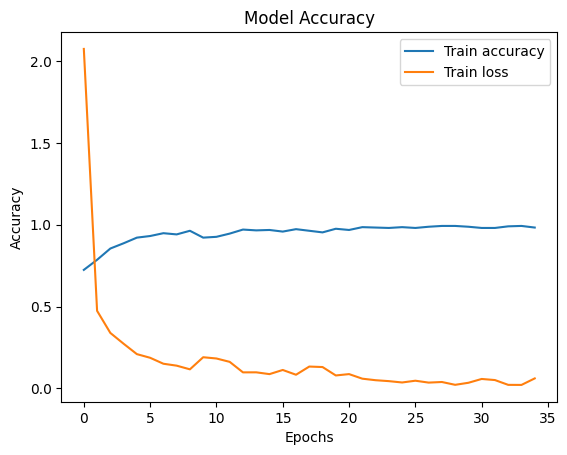

In [4]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train accuracy','Train loss'])
plt.show